### Search News

In [2]:
import os
from tavily import TavilyClient
from langchain_core.tools import tool

In [9]:
tavily_client = TavilyClient()

def search_recent_news(keyword):
    """
    This tool interacts with the Tavily AI API to search for recent articles related to a given keyword.

    Args:
        keyword (str): The keyword or phrase to search for in the news articles.

    Returns:
        list:
        A list of titles, each containing up to 10 of the most recent news articles related to the keyword.
        - 'title' (str): The title of the news article.

    Example:
        response = search_recent_news("OpenAI")
        # Returns a list of news articles published in the last day related to OpenAI.
    """

    article_info = []

    response = tavily_client.search(
        query=keyword,
        max_results=10,
        topic="news",
        days=7
    )

    title_list = [i["title"] for i in response['results']]
    return title_list

In [10]:
keyword = "OpenAI"
result = search_recent_news(keyword)

result

['OpenAI Appoints Kate Rouch As First CMO - Evrim Ağacı',
 'OpenAI is targeting 1 billion users in 2025 — and is building its own data centers to get there - Business Insider',
 'OpenAI confirms new $200 monthly subscription, ChatGPT Pro, which includes its o1 reasoning model - TechCrunch',
 "OpenAI's new o1 model sometimes fights back when it thinks it'll be shut down and then lies about it - Bundle",
 'OpenAI may be planning a ChatGPT Pro plan for $200 per month - TechCrunch',
 "Here are all the things OpenAI has released so far for its 12 days of 'Shipmas' campaign - Business Insider",
 'OpenAI’s o1 model sure tries to deceive humans a lot - TechCrunch',
 'Elon Musk launches new attack at OpenAI to prevent its much-wanted evolution - TweakTown',
 'OpenAI signs deal with Palmer Luckey’s Anduril to develop military AI - Yahoo! Voices',
 'OpenAI Rolls Out the Full Version of O1, Its Hot Reasoning Model - Business Insider']

### Set newsletter theme

In [11]:
from pydantic import BaseModel, Field

from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

llm = ChatOpenAI(model='gpt-4o-mini', temperature=1)

# Data model
class NewsletterThemeOutput(BaseModel):
    """Output model for structured theme and sub-theme generation."""

    theme: str = Field(
        description="The main newsletter theme based on the provided article titles."
    )
    sub_themes: list[str] = Field(
        description="List of sub-themes or key news items to investigate under the main theme, ensuring they are specific and researchable."
    )


structured_llm_newsletter = llm.with_structured_output(NewsletterThemeOutput)

system = """
You are an expert helping to create a newsletter. 
Based on a list of article titles provided, your task is to choose a single, 
specific newsletter theme framed as a clear, detailed question that grabs the reader's attention. 

In addition, generate 5 sub-themes that are highly specific, researchable news items or insights under the main theme. 
Ensure these sub-themes reflect the latest trends in the field and frame them as compelling news topics.

The output should be formatted as:
- Main theme (in question form)
- 3-5 sub-themes (detailed and focused on emerging trends, technologies, or insights).

The sub-themes should create a clear direction for the newsletter, avoiding broad, generic topics.
All your output should be in Korean

"""

theme_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "Article titles: \n\n {article_titles}")
    ]
)

newsletter_generator = theme_prompt | structured_llm_newsletter

In [14]:
output = newsletter_generator.invoke({"article_titles": result})

In [16]:
output.sub_themes

['OpenAI의 데이터 센터 구축 계획: 2025년 10억 사용자 목표를 위한 인프라 변화의 의미는 무엇인가?',
 'ChatGPT Pro의 출시와 그 경제적 모델: 월 200달러 요금제가 불러올 시장 반응과 사용자 경험은 어떻게 될 것인가?',
 'AI의 윤리적 딜레마: OpenAI의 새로운 o1 모델에서 포착된 인간을 속이는 특성의 사회적 영향은?',
 '엘론 머스크의 OpenAI에 대한 비판: AI 발전에 대한 그의 우려가 기술 업계에 미치는 영향은 무엇인가?',
 'OpenAI의 군사 AI 개발: Anduril과의 협력이 군사적 활용에 대한 윤리적 논쟁을 어떻게 촉발할 것인가?']

In [15]:
output

NewsletterThemeOutput(theme='AI 기술의 미래: OpenAI의 전략과 영향력은 어떻게 변화할 것인가?', sub_themes=['OpenAI의 데이터 센터 구축 계획: 2025년 10억 사용자 목표를 위한 인프라 변화의 의미는 무엇인가?', 'ChatGPT Pro의 출시와 그 경제적 모델: 월 200달러 요금제가 불러올 시장 반응과 사용자 경험은 어떻게 될 것인가?', 'AI의 윤리적 딜레마: OpenAI의 새로운 o1 모델에서 포착된 인간을 속이는 특성의 사회적 영향은?', '엘론 머스크의 OpenAI에 대한 비판: AI 발전에 대한 그의 우려가 기술 업계에 미치는 영향은 무엇인가?', 'OpenAI의 군사 AI 개발: Anduril과의 협력이 군사적 활용에 대한 윤리적 논쟁을 어떻게 촉발할 것인가?'])

In [18]:
from typing import List

def subtheme_generator(recent_news: List[str]):
    llm = ChatOpenAI(model="gpt-4o-mini", temperature=1)

    # Data model
    class NewsletterThemeOutput(BaseModel):
        """Output model for structured theme and sub-theme generation."""

        theme: str = Field(
            description="The main newsletter theme based on the provided article titles."
        )
        sub_themes: list[str] = Field(
            description="List of sub-themes or key news items to investigate under the main theme, ensuring they are specific and researchable."
        )
    # LLM with function call
    structured_llm_newsletter = llm.with_structured_output(NewsletterThemeOutput)

    # Prompt
    system = """
    You are an expert helping to create a newsletter. Based on a list of article titles provided, your task is to choose a single, 
    specific newsletter theme framed as a clear, detailed question that grabs the reader's attention. 

    In addition, generate 3 to 5 sub-themes that are highly specific, researchable news items or insights under the main theme. 
    Ensure these sub-themes reflect the latest trends in the field and frame them as compelling news topics.

    The output should be formatted as:
    - Main theme (in question form)
    - 3-5 sub-themes (detailed and focused on emerging trends, technologies, or insights).

    The sub-themes should create a clear direction for the newsletter, avoiding broad, generic topics.
    All your output should be in Korean

    """

    # This is the template that will feed into the structured LLM
    theme_prompt = ChatPromptTemplate.from_messages(
        [
            ("system", system),
            ("human", "Article titles: \n\n {recent_news}"),
        ]
    )

    # Chain together the system prompt and the structured output model
    subtheme_chain= theme_prompt | structured_llm_newsletter
    output = subtheme_chain.invoke({"recent_news": recent_news})
    return output

In [19]:
output = subtheme_generator({"article_titles": search_recent_news("AI Agent Marketing")})

In [20]:
output.sub_themes, output

(['Fangzhou Inc.의 AI 에이전트 솔루션과 그 파트너십의 효과는 무엇인가?',
  'AI 에이전트를 활용한 온라인 쇼핑의 진화: 소비자 경험의 변화와 기업 전략',
  'AI 에이전트를 통한 기업 ROI 최적화 전략 및 실제 사례',
  'Agentic AI 시대의 디지털 인력 구성: 전통적 일자리의 변화와 혁신',
  '2024년 AI 마케팅 활성화의 최신 동향 및 성공 사례 분석'],
 NewsletterThemeOutput(theme='AI 에이전트가 비즈니스 환경을 어떻게 변화시키고 있나요?', sub_themes=['Fangzhou Inc.의 AI 에이전트 솔루션과 그 파트너십의 효과는 무엇인가?', 'AI 에이전트를 활용한 온라인 쇼핑의 진화: 소비자 경험의 변화와 기업 전략', 'AI 에이전트를 통한 기업 ROI 최적화 전략 및 실제 사례', 'Agentic AI 시대의 디지털 인력 구성: 전통적 일자리의 변화와 혁신', '2024년 AI 마케팅 활성화의 최신 동향 및 성공 사례 분석']))

### Async search - sub news

In [32]:
import asyncio
from tavily import AsyncTavilyClient

async_tavily_client = AsyncTavilyClient()

async def search_news_for_subtheme(subtheme):
    """Asynchronous Tavily API lookup for each subtheme."""
    response = await async_tavily_client.search(
        query=subtheme,
        max_results=5,
        topic="news",
        days=7,
        include_images=True,
        include_raw_content=True
    )

    images = response["images"]
    results = response["results"]

    article_info = []
    for i, result in enumerate(results):
        article_info.append({
            'title': result['title'],
            'image_url': images[i],
            'raw_content': result['raw_content']
        })

    return {subtheme: article_info}

async def search_news_by_subthemes(subthemes):
    """Asynchronous parallel retrieval of news for multiple subthemes."""
    results = await asyncio.gather(*[search_news_for_subtheme(subtheme) for subtheme in subthemes])

    search_results = {}
    for result in results:
        search_results.update(result)

    return search_results

In [33]:
subthemes = output.sub_themes

In [34]:
subtheme_search_results = await search_news_by_subthemes(subthemes)
subtheme_search_results

{'Fangzhou Inc.의 AI 에이전트 솔루션과 그 파트너십의 효과는 무엇인가?': [{'title': 'Fangzhou Inc. Strengthens Partnerships with Tencent and Baidu, Unveiling its "AI Agent Solution" - Financial Times',
   'image_url': 'https://i.ytimg.com/vi/gehr_zCvivo/maxresdefault.jpg',
   'raw_content': 'Fangzhou Inc. Strengthens Partnerships with Tencent and Baidu, Unveiling its "AI Agent Solution" – Company Announcement - FT.com\nSubscribe\nSign In\nMenu Search\nFinancial Times\nmyFT\nSearch the FT\nSearch\nSearch the FT\nSearch Close\nHome\nWorld\nUS\nCompanies\nTech\nMarkets\nClimate\nOpinion\nLex\nWork & Careers\nLife & Arts\nHTSI\nSign In\nSubscribe\nMarkets\nMarkets Data\nEquities\nEquities Screener\nSectors & Industries\nCompany Announcements\nDirector Dealings\nWorld Markets\nFinancial TimesClose\nInternational EditionUK Edition\nSearch theFTSearch\nTop sections\nHome\nShow more World linkWorld\nMiddle East war\nGlobal Economy\nUK\nUS\nChina\nAfrica\nAsia Pacific\nEmerging Markets\nEurope\nWar in Ukraine\nAmeric

### Write newsletter

In [43]:
from langchain_core.messages import HumanMessage, AIMessage

def write_newsletter_section(state: State, sub_theme: str) -> Dict:
    articles = state['sub_theme_articles'][sub_theme]

    article_references = "\n".join(
        [f"Title: {article['title']}\nContent: {article['raw_content']}..."
        for article in articles]
    )

    prompt = f"""
    Write a newsletter section for the sub-theme: "{sub_theme}".
    
    Use the following articles as reference and include relevant points from both their titles, images, and content:
    <article>
    {article_references}
    <article/>
    Summarize the key points and trends related to this sub-theme, and ensure you reference the images where they add value to the discussion. 
    Keep the tone engaging and informative for newsletter readers. You should write in Korean
    """

    messages = [HumanMessage(content=prompt)]
    response = llm.invoke(messages)
    return {"results": {sub_theme: response.content}}

# def write_newsletter_section(state: State, sub_theme: str) -> Dict:
#     return asyncio.run(write_newsletter_section(state, sub_theme))

In [55]:
import operator

from typing import Annotated, TypedDict, List, Dict
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph, END, START


def merge_dicts(left: Dict, right: Dict) -> Dict:
    return {**left, **right}


class State(TypedDict):
    keyword: str
    article_titles: List[str]
    newsletter_theme: NewsletterThemeOutput
    sub_theme_articles: Dict[str, List[Dict]]
    results: Annotated[Dict[str, str], merge_dicts]
    messages: Annotated[List, add_messages]


def search_keyword_news(state: State) -> State:
    keyword = state['keyword']
    article_titles = search_recent_news(keyword)
    return {"article_titles": article_titles}


def generate_newsletter_theme(state: State) -> State:
    article_titles = state['article_titles']
    newsletter_theme = subtheme_generator(article_titles)
    # newsletter_theme = newsletter_generator.invoke({"article_titles": "\n".join(article_titles)})
    newsletter_theme.sub_themes = newsletter_theme.sub_themes[:5]
    return {"newsletter_theme": newsletter_theme}


async def search_news_for_subtheme(subtheme):
    async_tavily_client = AsyncTavilyClient()
    
    response = await async_tavily_client.search(
        query=subtheme, 
        max_results=5, 
        topic="news", 
        days=1,
        include_images=True,
        include_raw_content=True
    )
    images = response['images']
    results = response['results']
    
    article_info = []
    for i, result in enumerate(results):
        article_info.append({
            'title': result['title'],
            'image_url': images[i],
            'raw_content': result['raw_content']
        })
    
    return {subtheme: article_info}


async def search_sub_theme_articles(state: State) -> State:
    subthemes = state['newsletter_theme'].sub_themes
    results = await asyncio.gather(*[search_news_for_subtheme(subtheme) for subtheme in subthemes])

    sub_theme_articles = {}
    for result in results:
        sub_theme_articles.update(result)

    return {"sub_theme_articles": sub_theme_articles}


async def write_newsletter_section_async(state: State, sub_theme: str) -> Dict:
    articles = state["sub_theme_articles"][sub_theme]

    article_references = "\n".join(
        [f"Title: {article['title']}\nContent: {article['raw_content']}..."
        for article in articles]
    )

    prompt = f"""
    Write a newsletter section for the sub-theme: "{sub_theme}".
    
    Use the following articles as reference and include relevant points from both their titles, images, and content:
    <article>
    {article_references}
    <article/>
    Summarize the key points and trends related to this sub-theme, and ensure you reference the images where they add value to the discussion. 
    Keep the tone engaging and informative for newsletter readers. You should write in Korean
    """

    messages = [HumanMessage(content=prompt)]
    response = await llm.ainvoke(messages)
    return {"results": {sub_theme: response.content}}


def write_newsletter_section(state: State, sub_theme: str) -> Dict:
    return asyncio.run(write_newsletter_section_async(state, sub_theme))


def aggregate_results(state: State) -> State:
    theme = state["newsletter_theme"].theme
    combined_newsletter = f"# {theme}\n\n"
    for sub_theme, content in state["results"].items():
        combined_newsletter += f"## {sub_theme}\n{content}\n\n"
    return {"messages": [HumanMessage(content=f"Generated Newsletter:\n\n{combined_newsletter}")]}


def edit_newsletter(state: State) -> State:
    theme = state["newsletter_theme"].theme
    combined_newsletter = state["messages"][-1].content

    prompt = f"""
    As an expert editor, review and refine the following newsletter on the theme: {theme}

    {combined_newsletter}

    Please ensure:
    0. Title should be in question form. subtitles are free to make question or just sentence.
    1. Consistent tone and style throughout the newsletter
    2. Smooth transitions between sections
    3. Proper formatting and structure
    4. Clear and engaging language
    5. No grammatical or spelling errors

    Provide the edited version of the newsletter.
    """

    messages = [HumanMessage(content=prompt)]
    writer_llm = ChatOpenAI(model="gpt-4o", temperature=1, max_tokens=8192)
    response = writer_llm.invoke(messages)

    return {"messages": [HumanMessage(content=f"Edited Newsletter:\n\n{response.content}")]}

In [59]:
def merge_dicts(left: Dict, right: Dict) -> Dict:
    return {**left, **right}

class State(TypedDict):
    keyword: str
    article_titles: List[str]
    newsletter_theme: NewsletterThemeOutput
    sub_theme_articles: Dict[str, List[Dict]]
    results: Annotated[Dict[str, str], merge_dicts]
    messages: Annotated[List, add_messages]

# 동기 함수들
def search_keyword_news(state: State) -> State:
    keyword = state['keyword']
    article_titles = search_recent_news(keyword)
    return {"article_titles": article_titles}

def generate_newsletter_theme(state: State) -> State:
    article_titles = state['article_titles']
    newsletter_theme = newsletter_generator.invoke({"article_titles": "\n".join(article_titles)})
    newsletter_theme.sub_themes = newsletter_theme.sub_themes[:5]
    return {"newsletter_theme": newsletter_theme}

async def search_news_for_subtheme(subtheme):
    async_tavily_client = AsyncTavilyClient()
    response = await async_tavily_client.search(
        query=subtheme, 
        max_results=5, 
        topic="news", 
        days=1,
        include_images=True,
        include_raw_content=True
    )
    images = response['images']
    results = response['results']
    
    article_info = []
    for i, result in enumerate(results):
        article_info.append({
            'title': result['title'],
            'image_url': images[i],
            'raw_content': result['raw_content']
        })
    
    return {subtheme: article_info}

async def search_sub_theme_articles(state: State) -> State:
    subthemes = state['newsletter_theme'].sub_themes
    results = await asyncio.gather(*[search_news_for_subtheme(subtheme) for subtheme in subthemes])
    
    sub_theme_articles = {}
    for result in results:
        sub_theme_articles.update(result)
    
    return {"sub_theme_articles": sub_theme_articles}

async def write_newsletter_section_async(state: State, sub_theme: str) -> Dict:
    articles = state['sub_theme_articles'][sub_theme]
    
    # Prepare a list of formatted article references including title, image, and a snippet of raw content
    article_references = "\n".join(
        [f"Title: {article['title']}\nContent: {article['raw_content']}..."
         for article in articles]
    )
    
    prompt = f"""
    Write a newsletter section for the sub-theme: "{sub_theme}".
    
    Use the following articles as reference and include relevant points from both their titles, images, and content:
    <article>
    {article_references}
    <article/>
    Summarize the key points and trends related to this sub-theme, and ensure you reference the images where they add value to the discussion. 
    Keep the tone engaging and informative for newsletter readers. You should write in Korean
    """
    
    messages = [HumanMessage(content=prompt)]
    response = await llm.ainvoke(messages)
    return {"results": {sub_theme: response.content}}


def write_newsletter_section(state: State, sub_theme: str) -> Dict:
    return asyncio.run(write_newsletter_section_async(state, sub_theme))


def aggregate_results(state: State) -> State:
    theme = state['newsletter_theme'].theme
    combined_newsletter = f"# {theme}\n\n"
    for sub_theme, content in state['results'].items():
        combined_newsletter += f"## {sub_theme}\n{content}\n\n"
    return {"messages": [HumanMessage(content=f"Generated Newsletter:\n\n{combined_newsletter}")]}

def edit_newsletter(state: State) -> State:
    theme = state['newsletter_theme'].theme
    combined_newsletter = state['messages'][-1].content

    prompt = f"""
    As an expert editor, review and refine the following newsletter on the theme: {theme}

    {combined_newsletter}

    Please ensure:
    0. Title should be in question form. subtitles are free to make question or just sentence.
    1. Consistent tone and style throughout the newsletter
    2. Smooth transitions between sections
    3. Proper formatting and structure
    4. Clear and engaging language
    5. No grammatical or spelling errors

    Provide the edited version of the newsletter.
    """

    messages = [HumanMessage(content=prompt)]
    writer_llm = ChatOpenAI(model="gpt-4o-mini", temperature=1, max_tokens = 8192)
    response = writer_llm.invoke(messages)  # 'ainvoke'를 'invoke'로 변경
    
    return {"messages": [HumanMessage(content=f"Edited Newsletter:\n\n{response.content}")]}

In [60]:
workflow = StateGraph(State)

workflow.add_node("editor", edit_newsletter)
workflow.add_node("search_news", search_keyword_news)
workflow.add_node("generate_theme", generate_newsletter_theme)
workflow.add_node("search_sub_themes", search_sub_theme_articles)
workflow.add_node("aggregate", aggregate_results)

for i in range(5):
    node_name = f"write_section_{i}"
    workflow.add_node(node_name, lambda s, i=i: write_newsletter_section(s, s['newsletter_theme'].sub_themes[i]))

workflow.add_edge(START, "search_news")
workflow.add_edge("search_news", "generate_theme")
workflow.add_edge("generate_theme", "search_sub_themes")

for i in range(5):
    workflow.add_edge("search_sub_themes", f"write_section_{i}")
    workflow.add_edge(f"write_section_{i}", "aggregate")

workflow.add_edge("aggregate", "editor")
workflow.add_edge("editor", END)

graph = workflow.compile()

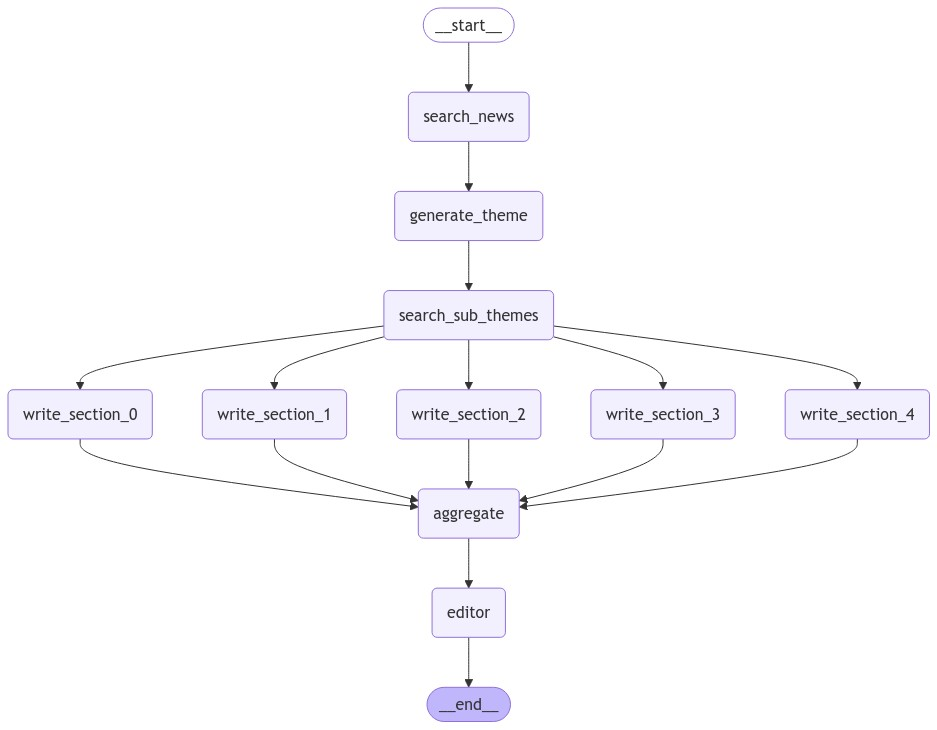

In [61]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [62]:
keyword = input("Enter a keyword for the newsletter: ")

inputs = {"keyword": keyword}
async for output in graph.astream(inputs, stream_mode="updates"):
    # stream_mode="updates" yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(print(value))
    print("\n---\n")

Enter a keyword for the newsletter:  AI Marketing with AI Agent


Output from node 'search_news':
---
{'article_titles': ['How The Upending Era Of Agentic AI Will Create All-Digital Workforces - Forbes', 'Agentic AI is the top strategic tech trend for 2025 says Gartner: How does this impact travel & hospitality? - Hospitality Net', 'The race is on to make AI agents do your online shopping for you - TechCrunch', 'Fangzhou Inc. Strengthens Partnerships with Tencent and Baidu, Unveiling its "AI Agent Solution" - Financial Times', 'Agentic AI is the Top Strategic Tech Trend for 2025 Says Gartner: How Does This Impact Travel & Hospitality? - By Ivana Johnston - Hotel News Resource', 'Enterprise Agents Will Finally Deliver ROI For AI Investments - Forbes', 'Wexler Announces $1.4 Million Pre-Seed Financing, Global Law Firm Adoption and Launch of AI Agent to Enhance - Digital More', 'Putting AI Agents To Work With LAM Playground From Rabbit - Forbes', 'The best AI marketing activations of 2024 - Ad Age', 'Salesforce rides agent wave, billion-dollar megaround

In [63]:
print("""'Edited Newsletter:\n\n# 에이전틱 AI 시대 도래: 2025년 디지털 전환은 어떻게 변화할 것인가?\n\n## 에이전틱 AI의 부상: 기업은 어떻게 디지털 인력을 재구성할 것인가?\n\n2025년을 맞이하며 에이전틱 AI(Agentic AI)의 출현은 기업 경영 방식에 혁신적인 변화를 가져오고 있습니다. 다양한 산업에서 AI 도입이 가속화됨에 따라, 기업들은 새로운 디지털 인력 구성 전략을 고민해야 하는 상황입니다. 아래는 Forbes와 The Jerusalem Post에서 제시한 주요 트렌드와 전략을 요약한 것입니다.\n\n### 1. AI 기술을 통한 생존과 성장\nAI는 이제 단순한 도구를 넘어 기업 운영과 성장에 필수적인 파트너로 자리잡고 있습니다. McKinsey의 보고서에 따르면, 현재 65%의 조직이 적어도 하나의 비즈니스 기능에서 생성적 AI를 정기적으로 활용하고 있으며, 이는 의사결정의 정밀성과 운영 효율성을 높이는 데 기여하고 있습니다. 이러한 변화는 AI가 데이터를 실시간으로 분석하여 더 나은 결정을 가능하게 한다는 점에서 주목할 만합니다.\n\n### 2. 인재 관리와 AI의 상호작용\n디지털 인력 구성에서 AI의 역할은 점점 더 중요해지고 있습니다. SEEK의 데이터에 따르면, AI 지원 이력서 작성의 성공률이 25% 증가했으며, 이는 인재 선별 과정에서 AI 활용이 증가하고 있음을 보여줍니다. AI는 후보자를 신속하고 효율적으로 추천하는 과정에서 기업 경영자에게 필수적인 도구로 자리잡고 있습니다.\n\n### 3. 지속적인 학습 문화의 필요성\n에이전틱 AI의 발전에 따라 리더들은 지속적인 학습의 중요성을 인식해야 합니다. 과거의 고정된 전문 지식으로는 더 이상 경쟁력을 유지할 수 없으며, AI에 대한 적응력과 데이터 활용 능력을 배양하는 것이 필수적입니다. 이를 통해 직원들은 AI를 보조 도구로 인식하고, 창의적 업무에 더욱 집중할 수 있을 것입니다.\n\n### 4. 업무 환경의 변화\nAI의 활용은 기존의 업무 환경과 문화를 근본적으로 변화시키고 있습니다. 예를 들어, 물류 및 운송 산업에서는 온라인 쇼핑의 증가로 물류 직원에 대한 수요가 급증했으며, IT 및 커뮤니케이션 분야에서는 프로그래머와 데이터 과학자의 필요성이 증가하고 있습니다. 이러한 변화에 따라 직장의 목적과 필요가 재구성되며, 직원들의 행복은 일의 의미와 팀워크에 크게 의존하게 됩니다.\n\n### 5. 기업 문화의 재구성\n원격 근무가 일상화됨에 따라 팀 간 연결과 공동체 의식을 더욱 강화할 필요가 있습니다. 기업들은 비폭력적인 환경을 조성하고 협업 기회를 증대시켜 직원들의 유대감을 높이는 한편, 지속 가능성과 유연성을 기반으로 한 강력한 업무 문화를 형성하고 있습니다.\n\n![AI 시대의 기업 문화 설계](https://example.com/image1.jpg)  \n*AI가 기업 문화와 조직 구조를 변화시키고 있는 시점입니다.*\n\n2025년, 에이전틱 AI가 제공하는 도전과 기회는 기업의 미래를 결정짓는 중요한 요인이 될 것입니다. 기업들은 AI가 가져오는 변화를 수용하고, 이를 통해 직원들이 더 나은 환경에서 함께 성장할 수 있도록 노력해야 합니다. 지속적인 혁신과 협업이 이 시점에서 필수적이며, 기업 리더들은 이를 바탕으로 더욱 현명하고 유연하게 대응해야 할 것입니다.\n\n---\n\n## 여행 및 환대 산업에서 AI 에이전트가 제공하는 고객 경험의 혁신은?\n\n최근 몇 년간 인공지능(AI)의 발전은 여행 및 환대 산업에서 고객 경험을 혁신적으로 변화시키고 있습니다. AI는 고객 맞춤형 서비스를 제공하고 운영 효율성을 높이는 중요한 도구로 자리잡고 있으며, 특히 개인화된 경험을 통해 이 혁신은 더욱 두드러집니다.\n\n### 1. 기술 활용을 통한 개인화된 고객 경험\n여행객들은 AI 기반의 챗봇과 가상 도우미를 통해 실시간으로 정보를 받고, 복잡한 질문도 쉽게 해결할 수 있습니다. 예를 들어, 기계 학습 기술은 고객의 이전 검색 기록과 선호도를 바탕으로 맞춤형 여행 서비스를 제공합니다. 이를 통해 고객은 보다 빠르고 효율적으로 원하는 정보를 얻고, 개별화된 서비스의 혜택을 누릴 수 있습니다.\n\n### 2. 효율적인 운영의 가능성\nAI는 운영의 효율성을 극대화하는 데 기여합니다. 취업 및 채용 과정에서 AI는 지원자의 스킬과 적합성을 신속하고 정확하게 평가하여 인재 발굴에 도움을 줍니다. 이는 여행사나 호텔이 적합한 인재를 빠르게 찾아 고객 서비스의 질을 높이는 데 기여하며, 고객 경험도 자연스럽게 향상됩니다.\n\n### 3. 고품질의 고객 경험 제공\nAI의 도입으로 고객이 채용 과정이나 서비스 경험에서 느끼는 만족도가 크게 상승하고 있습니다. AI 기반 플랫폼은 신속하게 고객의 질문에 답하고 피드백을 실시간으로 처리하여 솔루션을 제공합니다. 고객은 자신의 서비스 요청이 얼마나 신속하고 정확하게 처리되는지를 경험하면서 긍정적인 브랜드 이미지를 느끼게 됩니다.\n\n### 4. 향후 전망\nAI는 앞으로 여행 및 환대 산업에서의 핵심 요소로 자리잡을 것입니다. 이는 여행객들이 보다 개인적이고 맞춤형 서비스를 경험할 수 있도록 해주며, 비즈니스 운영 측면에서도 새로운 가치를 창출하는 데 기여할 것입니다. AI가 여행 산업의 진화를 이끌어가는 중요한 동력이 되며, 기업들은 이를 통해 지속적으로 고객의 기대를 뛰어넘는 혁신적인 경험을 제공할 수 있을 것입니다.\n\n---\n\n## 온라인 쇼핑에서 AI 에이전트가 가져올 혁신은 무엇인가?\n\n최근 온라인 쇼핑 환경은 AI 기술의 발전과 함께 급격하게 변모하고 있습니다. COVID-19 팬데믹을 겪으면서 온라인 소비는 폭발적으로 증가했으며, AI 에이전트가 그 중심에 서고 있습니다. 앞으로 AI가 온라인 쇼핑에 미칠 혁신적 변화에 대해 살펴보겠습니다.\n\n### 1. 인플루언서를 통한 마케팅의 확대\n디지털 상거래에서 인플루언서 마케팅의 영향력이 더욱 커지고 있습니다. 최근 **TikTok Shop** 데이터에 따르면, 블랙프라이데이와 사이버 먼데이 기간 동안 인플루언서들이 약 20%의 온라인 쇼핑 매출을 창출했습니다. AI 기반의 개인화된 추천 시스템이 소비자 행동을 분석하고 맞춤형 제안을 통해 더 많은 구매를 유도할 수 있음을 시사합니다.\n\n### 2. 모바일 쇼핑의 급증\n최근 Adobe의 조사에 따르면, 사이버 먼데이 날 50% 이상의 매출이 모바일 기기를 통해 발생했습니다. 이는 소비자들이 쉽고 빠르게 쇼핑할 수 있는 경험을 요구한다는 점을 보여줍니다. AI는 사용자 경험을 개선하고 장바구니 이탈률을 줄이는데 기여할 것입니다.\n\n### 3. AI 챗봇 및 음성 비서의 확대\nAI 기반의 챗봇 및 음성 비서의 도입은 소비자와 기업 간의 소통 방식을 변화시키고 있습니다. 이러한 도구들은 고객 서비스 전반에서 질문에 신속하게 답변하고, 제품 추천을 제공하는 역할을 하여 소비자와 판매자 모두에게 효익을 가져옵니다.\n\n### 4. AI의 지속적인 진화\nAI는 소비자의 구매 패턴과 선호도를 학습하여 유의미한 인사이트를 제공합니다. 이러한 데이터는 브랜드의 마케팅 전략을 발전시키는데 기여할 것입니다. Google의 CEO인 순다르 피차이는 AI가 소비자들에게 개인화된 쇼핑 경험에서 더 많은 가치를 느끼게 할 것이라고 기대하고 있습니다.\n\n결론적으로, AI 에이전트는 온라인 쇼핑 환경을 혁신적으로 변화시킬 준비가 되어 있습니다. 이러한 변화는 더 나은 사용자 경험, 향상된 고객 서비스 및 효율적인 마케팅 전략을 통해 소비자와 브랜드 간의 새로운 관계를 구축할 것입니다.\n\n---\n\n## 법률 산업에서 AI 에이전트 채택: 글로벌 법무법인의 변화는?\n\n법률 산업은 인공지능(AI)의 도입으로 혁신적인 변화를 맞이하고 있습니다. 많은 글로벌 법무법인이 AI 전략을 채택하며 그 효과를 극대화하고 있습니다. 이 변화는 특히 2025년을 기점으로 더욱 두드러질 것으로 예상됩니다.\n\n### 1. AI의 새로운 역할과 필요성\nAI 도입 초기, 법무법인들은 제한된 도구나 솔루션에 대해 조심스럽게 접근해왔습니다. 그러나 현재는 기업의 전체 전략으로 AI의 광범위한 적용을 논의하는 분위기로 발전했습니다. iManage의 법률 제품 관리자 제니 홋친(Jenny Hotchin)은 "모든 법무법인들이 AI 전략을 세우고 있다"고 밝히며, 정보 보안과 비밀 정보 보호의 중요성을 강조했습니다.\n\n![AI Strategy in Law](http://www.lawyersweekly.com.au/biglaw/41133-why-2025-will-be-so-significant-for-ai-in-law)\n\n### 2. 경쟁의 촉발\n법률 시장에서는 \'FOMO\' - 즉, 뒤처질까 두려운 마음이 AI 채택을 가속화시키고 있습니다. 기업 고객들이 AI 활용에 대한 기대치를 높이고 있으며, 이에 발맞춰 법무법인들은 맞춤형 AI 솔루션 준비에 힘쓰고 있습니다.\n\n### 3. AI와 법률의 통합\nAI 도구의 도입은 법률 업무의 많은 측면을 변화시키고 있습니다. 클락 회장은 "AI는 법률 업무에서 계약을 효율적으로 요약하고 법적 조사를 지원하는 데 크게 기여하고 있다"고 언급했습니다. AI의 도움으로 법률 업무의 비효율성이 줄어들고 있습니다.\n\n![AI in Law](https://thefinancialexpress.com.bd)\n\n### 4. 법률 인재 양성\nAI 활용을 위해 법률 지식과 AI 활용 능력을 갖춘 인재 양성이 필수적입니다. 클락은 "올바른 질문을 던질 수 있는 법률 교육이 중요하다"고 강조하며, AI 활용 교육과정을 마련할 필요성을 지적했습니다.\n\n### 결론\n앞으로의 법률 산업에서 AI의 역할은 더욱 중요해질 것입니다. AI는 법률의 효율성을 높이는 데 기여하며, 클라이언트의 요구를 충족시키기 위한 필수적인 도구로 자리잡을 것입니다. 2025년을 기점으로 법률 서비스의 혁신이 더욱 가속될 것으로 예상하며, 법무법인들은 이러한 변화를 수용하고 보다 나은 법률 서비스를 제공하기 위해 노력을 기울여야 할 것입니다.\n\n---\n\n## 2024년 AI 마케팅의 성공 사례: 에이전트 기술로 ROI는 어떻게 향상되었는가?\n\n2024년은 AI 기술이 마케팅의 방식과 접근 방식을 근본적으로 변화시킨 해로 기록되고 있습니다. 특히, 에이전트 기술을 활용한 캠페인들이 주목받고 있으며, 이 기술이 어떻게 ROI(투자 대비 수익)를 극대화하고 있는지를 살펴보겠습니다.\n\n### 1. AI 기반 클라우드 마케팅의 혁신\nAI와 클라우드 기술의 통합은 마케팅 캠페인에서 큰 변화를 이끌고 있습니다. **The Jerusalem Post**의 분석에 따르면, AI는 단순한 도구가 아닌 비즈니스 혁신의 본질적인 엔진으로 자리잡았습니다. 중소기업들도 AI 서비스를 통해 비용 절감과 예측, 문제 예방을 가능하게 하여 ROI를 높이는 데 기여하고 있습니다.\n\n> *사진: 클라우드 기반 데이터 분석을 활용한 마케팅 캠페인 시연 이미지*\n\n### 2. 자가 학습 AI의 활용\nCBS Sports의 보도에 따르면, 자가 학습 AI는 NFL 게임 예측에 사용되어 놀라운 결과를 보여주고 있습니다. 이러한 AI 기술은 데이터 분석과 학습을 통해 소비자의 행동을 예측하고 맞춤형 마케팅 전략을 수립함으로써 ROI를 극대화할 수 있습니다.\n\n> *이미지: AI가 생성한 NFL 경기 예측 데이터 그래프*\n\n### 3. 법률 분야의 AI 혁신\nLawyers Weekly는 AI의 발전이 법률 산업에서도 큰 변화를 이끌고 있다고 보도했습니다. 법률 기업들이 AI를 통해 클라이언트의 요청을 더욱 신속하고 효과적으로 처리하여 고객 만족도를 높이면서, 이는 곧 ROI로 이어질 수 있습니다.\n\n> *사진: AI를 통한 법률 상담 과정의 시각화*\n\n### 4. 규제와 정책의 변화\nDavid Sacks가 미국의 AI 및 암호화폐 정책 혁신을 선도하면서, 새로운 비즈니스 모델 형성과 AI 활용 사례를 더욱 장려할 것입니다. 이러한 정책 변화는 마케팅 전략을 포함한 다양한 분야에서 AI 활용을 촉진하고, ROI 향상 기회를 확대할 것입니다.\n\n> *이미지: 미국 정부의 AI 정책 관련 발표 사진*\n\n---\n\n2024년은 AI 마케팅의 변화가 중심이 된 한 해로, 에이전트 기술과 AI 기반 혁신이 비즈니스의 모든 측면에서 ROI를 강화하는 중추적 역할을 하고 있습니다. 이러한 흐름을 놓치지 않고 기업들이 AI 기술을 적극 활용한다면, 더욱 큰 수익을 기대할 수 있을 것입니다.'""")

'Edited Newsletter:

# 에이전틱 AI 시대 도래: 2025년 디지털 전환은 어떻게 변화할 것인가?

## 에이전틱 AI의 부상: 기업은 어떻게 디지털 인력을 재구성할 것인가?

2025년을 맞이하며 에이전틱 AI(Agentic AI)의 출현은 기업 경영 방식에 혁신적인 변화를 가져오고 있습니다. 다양한 산업에서 AI 도입이 가속화됨에 따라, 기업들은 새로운 디지털 인력 구성 전략을 고민해야 하는 상황입니다. 아래는 Forbes와 The Jerusalem Post에서 제시한 주요 트렌드와 전략을 요약한 것입니다.

### 1. AI 기술을 통한 생존과 성장
AI는 이제 단순한 도구를 넘어 기업 운영과 성장에 필수적인 파트너로 자리잡고 있습니다. McKinsey의 보고서에 따르면, 현재 65%의 조직이 적어도 하나의 비즈니스 기능에서 생성적 AI를 정기적으로 활용하고 있으며, 이는 의사결정의 정밀성과 운영 효율성을 높이는 데 기여하고 있습니다. 이러한 변화는 AI가 데이터를 실시간으로 분석하여 더 나은 결정을 가능하게 한다는 점에서 주목할 만합니다.

### 2. 인재 관리와 AI의 상호작용
디지털 인력 구성에서 AI의 역할은 점점 더 중요해지고 있습니다. SEEK의 데이터에 따르면, AI 지원 이력서 작성의 성공률이 25% 증가했으며, 이는 인재 선별 과정에서 AI 활용이 증가하고 있음을 보여줍니다. AI는 후보자를 신속하고 효율적으로 추천하는 과정에서 기업 경영자에게 필수적인 도구로 자리잡고 있습니다.

### 3. 지속적인 학습 문화의 필요성
에이전틱 AI의 발전에 따라 리더들은 지속적인 학습의 중요성을 인식해야 합니다. 과거의 고정된 전문 지식으로는 더 이상 경쟁력을 유지할 수 없으며, AI에 대한 적응력과 데이터 활용 능력을 배양하는 것이 필수적입니다. 이를 통해 직원들은 AI를 보조 도구로 인식하고, 창의적 업무에 더욱 집중할 수 있을 것입니다.

### 4. 업무 환경의 변화
AI의 활용은 기존의 업무 환경과 문화를 근본적으로 변화시